NAME : ASMELLASH G/YESUS 
    ID-NO :RM/0933/14
        TOPIC : HATE SPEECH DETECTION AFAAN OROMO TEXT ON SOCIAL MEDIA 

ABOUT THE DATASET
  the data set has two feature (attribute)
  1. post (the input variable or the independent variable)
  2. label (the out variable or the dependent variable)
  THE IN PUT VARIABLE ARE THE TEXT AND THE OUTPUT VARIABLE ARE THE LABEL EITHER THE TEXT IS NORMAL OR HATE

# importing library

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import itemfreq
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
import string
Hate = pd.read_excel("E:\ml\hate1.xlsx", header = None)
Hate.rename(columns={0:'post', 1:'label'}, inplace=True)
my_labels = ['hate', 'normal']

# 1. DATA CLEANING

In [3]:
Hate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    4000 non-null   object
 1   label   4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [4]:
Hate.shape

(4000, 2)

In [5]:
# ENCODING 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [6]:
Hate['label']=encoder.fit_transform(Hate['label'])
Hate.head()

,post,label
0,Mumicha minster Ethiopian jawar Mohammed 2020 ...,1
1,Rabbiin dhabamaa si haa godhuu malee xalaatni ...,0
2,Kiyaa Ajawaa kana dhagefachu jibee wly Walaga...,0
3,dubartoonni Oromoo dress qofa jijjiiradhaa paa...,1
4,Ani omn koo dhabe midia amara jelaa ilala tur...,1


In [73]:
Hate.tail()

,post,label,num_characters,num_words,num_sentence,transformed_text
3981,akkakeetu jira hoo eessatti tola biyyi,0,38,6,1,akkakeetu jira hoo eessatti tola biyyi
3985,girrisoo harammoo wayyaaeera,0,28,3,1,girrisoo harammoo wayyaaeera
3986,taguggaa,0,8,1,1,taguggaa
3989,afuuuuuftuuuuuuuuuiui,0,21,1,1,afuuuuuftuuuuuuuuuiui
3998,sirrii dubbatte,0,15,2,1,sirrii dubbatt


In [7]:
Hate['label'].value_counts()

1    2465
0    1535
Name: label, dtype: int64

In [8]:
# missing values
Hate.isnull().sum()

post     0
label    0
dtype: int64

In [9]:
# check fro duplicate values
Hate.duplicated().sum()

162

In [10]:
#removing duplicated
Hate=Hate.drop_duplicates(keep='first')

In [11]:
Hate.duplicated().sum()

0

In [12]:
Hate.shape

(3838, 2)

In [13]:
Hate['label'].value_counts()

1    2433
0    1405
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x235eca9e370>,
 [Text(-0.4492740980628608, 1.004068117614439, 'normal'),
  Text(0.44927419207050084, -1.0040680755503577, 'hate')],
 [Text(-0.24505859894337859, 0.5476735186987849, '63.39'),
  Text(0.24505865022027315, -0.5476734957547404, '36.61')])

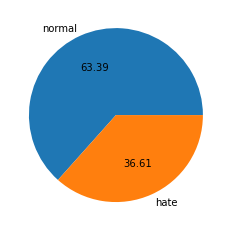

In [14]:
import matplotlib.pyplot as plt
plt.pie(Hate['label'].value_counts(),labels=['normal','hate'],autopct="%0.2f")

In [15]:
# data is imbalanced

In [72]:
# describing by labels
Hate.groupby('label').describe()

num_characters                                                      \
               count       mean        std  min   25%   50%   75%    max   
label                                                                      
0             1405.0  55.757295  57.760115  3.0  19.0  38.0  69.0  669.0   
1             2433.0  40.494451  29.559890  0.0  19.0  35.0  52.0  225.0   

      num_words            ...             num_sentence                      \
          count      mean  ...   75%   max        count      mean       std   
label                      ...                                                
0        1405.0  7.884698  ...  10.0  83.0       1405.0  0.997865  0.046176   
1        2433.0  6.061652  ...   8.0  47.0       2433.0  0.997123  0.053572   

                                
       min  25%  50%  75%  max  
label                           
0      0.0  1.0  1.0  1.0  1.0  
1      0.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

In [74]:
Hate['label'].unique()

array([1, 0])

In [75]:
Hate['post'].unique()

array(['mumicha minster ethiopian jawar mohammed  inshallah ',
       'rabbiin dhabamaa si haa godhuu xalaatni tokko siii qomaxaa saree daniel kibrat walin tatee masjidaa qubdee rabbii si haa gubuu ilmaa fincaan minilik fagaara  dr zinaash',
       'kiyaa ajawaa dhagefachu jibee wly  walagaatii ilmaan oromoo dhumaa jirtii inii asii kijibaa ',
       ..., 'taguggaa', 'afuuuuuftuuuuuuuuuiui', 'sirrii dubbatte'],
      dtype=object)

In [77]:
Hate.describe()

,label,num_characters,num_words,num_sentence
count,3838.000000,3838.000000,3838.000000,3838.000000
mean,0.633924,46.081813,6.729026,0.997394
std,0.481793,42.762938,5.961657,0.050984
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,3.000000,1.000000
50%,1.000000,35.000000,5.000000,1.000000
75%,1.000000,58.000000,8.000000,1.000000
max,1.000000,669.000000,83.000000,1.000000


In [78]:
# categorical column : Counts
Hate.label.value_counts()

1    2433
0    1405
Name: label, dtype: int64

In [79]:
# categorical column : Proprotions
Hate.label.value_counts(normalize=True)

1    0.633924
0    0.366076
Name: label, dtype: float64

<AxesSubplot:>

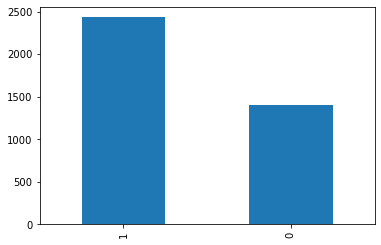

In [80]:
# visualize counts
Hate.label.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'the speech wise counter label'}>

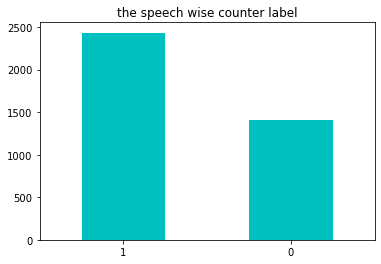

In [81]:
# title : to set title, color : to set color,  rot : to rotate labels 
Hate.label.value_counts().plot(kind='bar',rot = 0, title='the speech wise counter label', color='c')

([<matplotlib.patches.Wedge at 0x235a3d5b850>,
 [Text(-0.4492740980628608, 1.004068117614439, 'normal'),
  Text(0.44927419207050084, -1.0040680755503577, 'hate')])

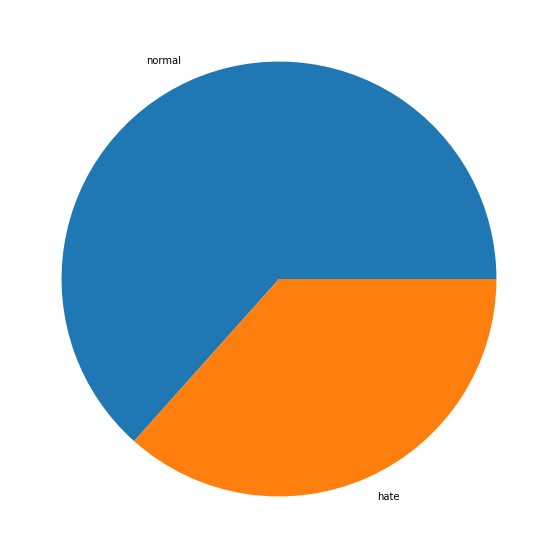

In [82]:
#mat plot our data set labeling
plt.figure(figsize=(20,10))
label=["normal","hate"]
#Show the histogram
plt.pie(Hate.label.value_counts(),labels=label)

In [84]:
# describing by labels
Hate.groupby('label').describe()

num_characters                                                      \
               count       mean        std  min   25%   50%   75%    max   
label                                                                      
0             1405.0  55.757295  57.760115  3.0  19.0  38.0  69.0  669.0   
1             2433.0  40.494451  29.559890  0.0  19.0  35.0  52.0  225.0   

      num_words            ...             num_sentence                      \
          count      mean  ...   75%   max        count      mean       std   
label                      ...                                                
0        1405.0  7.884698  ...  10.0  83.0       1405.0  0.997865  0.046176   
1        2433.0  6.061652  ...   8.0  47.0       2433.0  0.997123  0.053572   

                                
       min  25%  50%  75%  max  
label                           
0      0.0  1.0  1.0  1.0  1.0  
1      0.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

 2.EXPLORE DATA ANALYSIS

In [16]:
import nltk
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('oromiffa')
def clean_text():
    #convert all data into lower letter
    Hate["post"] = Hate["post"].apply(lambda x: str(x).lower())
    #remove punctuation
    Hate["post"] = Hate["post"].apply(lambda tweet: tweet.translate(str.maketrans('', '', string.punctuation)))
    #remove number number and symbols
    Hate["post"] = Hate["post"].apply(lambda tweet: tweet.translate(str.maketrans('', '', "0123456789❤♀️♥⚽️《")) )
    #remove stop words
    Hate["post"] = Hate["post"].str.split(' ').apply(lambda tweet: ' '.join(k for k in tweet if k not in STOPWORDS))
clean_text()
print(Hate.head(10))

                                                post  label
0  mumicha minster ethiopian jawar mohammed  insh...      1
1  rabbiin dhabamaa si haa godhuu xalaatni tokko ...      0
2  kiyaa ajawaa dhagefachu jibee wly  walagaatii ...      0
3  dubartoonni oromoo dress qofa jijjiiradhaa paa...      1
4  omn dhabe midia  amara jelaa ilala turee namit...      1
5  ethiopia  bulchuu  miti jimmaa  kantibaa  tate...      0
6  kaabineen comment dhageeffachuuf seentan moo w...      1
7   abiyin aradhaa wanaa jawaar qequu asiratti du...      0
8  ijoolleen amrifaa hin benee muctii harkaa harg...      1
9  amara jelaa fiiguu jarii dibanii sii nyacha ji...      1


In [17]:
#number of character
Hate['num_characters']=Hate['post'].apply(len)

In [18]:
Hate.head()

,post,label,num_characters
0,mumicha minster ethiopian jawar mohammed insh...,1,52
1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...,0,168
2,kiyaa ajawaa dhagefachu jibee wly walagaatii ...,0,92
3,dubartoonni oromoo dress qofa jijjiiradhaa paa...,1,81
4,omn dhabe midia amara jelaa ilala turee namit...,1,79


In [19]:
#number of words
Hate['num_words']=Hate['post'].apply(lambda x:len(nltk.word_tokenize(x)))
Hate.head()

,post,label,num_characters,num_words
0,mumicha minster ethiopian jawar mohammed insh...,1,52,6
1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...,0,168,26
2,kiyaa ajawaa dhagefachu jibee wly walagaatii ...,0,92,13
3,dubartoonni oromoo dress qofa jijjiiradhaa paa...,1,81,10
4,omn dhabe midia amara jelaa ilala turee namit...,1,79,13


In [20]:
#number of sentence and sentence tokenize
Hate['num_sentence']=Hate['post'].apply(lambda x:len(nltk.sent_tokenize(x)))
Hate.head()

,post,label,num_characters,num_words,num_sentence
0,mumicha minster ethiopian jawar mohammed insh...,1,52,6,1
1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...,0,168,26,1
2,kiyaa ajawaa dhagefachu jibee wly walagaatii ...,0,92,13,1
3,dubartoonni oromoo dress qofa jijjiiradhaa paa...,1,81,10,1
4,omn dhabe midia amara jelaa ilala turee namit...,1,79,13,1


In [21]:
#describe for the number of characters,num_words,num_sentence
Hate[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3838.000000,3838.000000,3838.000000
mean,46.081813,6.729026,0.997394
std,42.762938,5.961657,0.050984
min,0.000000,0.000000,0.000000
25%,19.000000,3.000000,1.000000
50%,35.000000,5.000000,1.000000
75%,58.000000,8.000000,1.000000
max,669.000000,83.000000,1.000000


In [22]:
# Describe for the hate 
Hate[Hate['label']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1405.000000,1405.000000,1405.000000
mean,55.757295,7.884698,0.997865
std,57.760115,7.862209,0.046176
min,3.000000,0.000000,0.000000
25%,19.000000,3.000000,1.000000
50%,38.000000,5.000000,1.000000
75%,69.000000,10.000000,1.000000
max,669.000000,83.000000,1.000000


In [23]:
# Describe for the normal 
Hate[Hate['label']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,2433.000000,2433.000000,2433.000000
mean,40.494451,6.061652,0.997123
std,29.559890,4.378511,0.053572
min,0.000000,0.000000,0.000000
25%,19.000000,3.000000,1.000000
50%,35.000000,5.000000,1.000000
75%,52.000000,8.000000,1.000000
max,225.000000,47.000000,1.000000


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

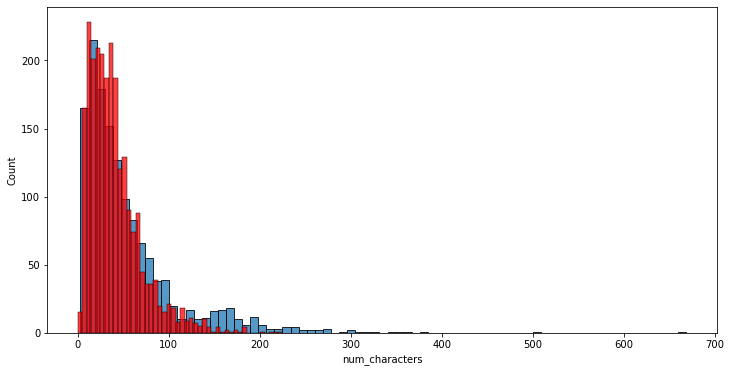

In [25]:
plt.figure(figsize=((12,6)))
sns.histplot(Hate[Hate['label']==0]['num_characters'])
sns.histplot(Hate[Hate['label']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

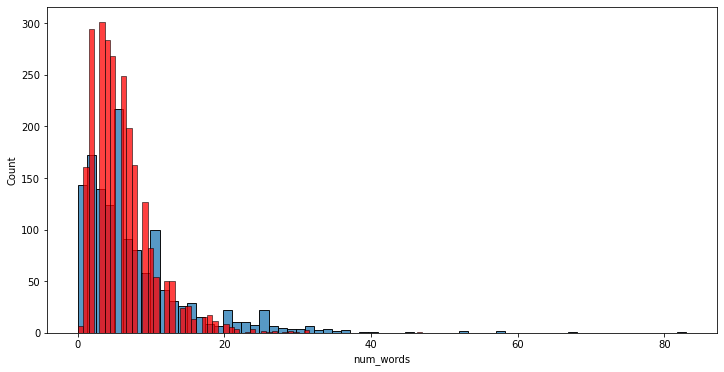

In [26]:
plt.figure(figsize=((12,6)))
sns.histplot(Hate[Hate['label']==0]['num_words'])
sns.histplot(Hate[Hate['label']==1]['num_words'],color='red')

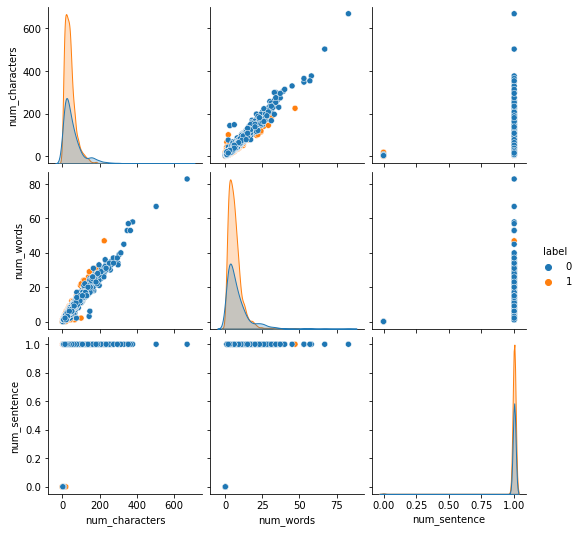

In [27]:
#correlation 
sns.pairplot(Hate,hue='label')

<AxesSubplot:>

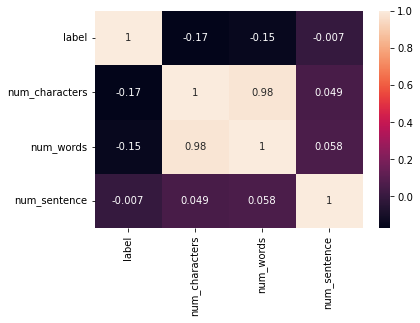

In [28]:
#correlation coeffecient
sns.heatmap(Hate.corr(),annot=True)

3.DATA PREPROCESSING
lower case
Tokenization
Removing special characters
Removing stop words and punctuation
stemming

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [30]:
#change the text to the lower case and removing the special character
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        text=y[:]
        y.clear()
        for i in text:
            if i not in stopwords.words('oromiffa')and i not in string.punctuation:
                y.append(i)
        text=y[:]
        y.clear()
        for i in text:
                    y.append(ps.stem(i))
    return " ".join(y) 
    

In [31]:
import nltk
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('oromiffa')
print(STOPWORDS)

['aanee', 'gidduu', 'itti', 'narraa', 'akka', 'gubbaa', 'ittuu', 'natti', 'akkam', 'hanga ', 'jala', 'nu', 'akkasumas', 'henna', 'jara', 'nurraa', 'akkuma', 'hogguu', 'sana', 'nuti', 'ala', 'illee', 'kan', 'siin', 'alatti', 'immoo', 'kana', 'silaa', 'amma', 'inni', 'kanaafi', 'kanaaf', 'sitti', 'ammo', 'irra', 'kanaafuu', 'sun', 'an', 'isaa', 'kee', 'tanaaf', 'ani', 'isaaf', 'keenna', 'tanaafuu', 'ati', 'isaanirraa', 'keessa', 'ta‟ullee', 'bira', 'isatti', 'keessan', 'teenya', 'booda', 'tun', 'keenya', 'utuu', 'booddee', 'iseen', 'keessatti', 'waan', 'dura', 'ishii', 'kiyya', 'warra', 'duuba', 'ishiif', 'koo', 'yeroo', 'eega', 'ishiirraa', 'kun', 'yommuu', 'eegasii', 'isii', 'malee', 'yoo', 'fi', 'isin', 'na', 'yookaan', 'gama', 'isiin', 'naaf', 'yoom', 'kun']


In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
# example
transform_text('qoyii dhaltun kuulloo abichu abichu jetee maa maratii waa qabasisee moo kaa akntii jaraa marachufi ')


'qoyii dhaltun kuulloo abichu abichu jete maa maratii waa qabasi moo kaa akntii jaraa marachufi'

In [34]:
Hate['post'][10]

'qoyii dhaltun kuulloo abichu abichu jetee maa maratii waa qabasisee moo kaa akntii jaraa marachufi '

In [35]:
Hate['transformed_text']=Hate['post'].apply(transform_text)

In [36]:
Hate.head()

,post,label,num_characters,num_words,num_sentence,transformed_text
0,mumicha minster ethiopian jawar mohammed insh...,1,52,6,1,mumicha minster ethiopian jawar moham inshallah
1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...,0,168,26,1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...
2,kiyaa ajawaa dhagefachu jibee wly walagaatii ...,0,92,13,1,kiyaa ajawaa dhagefachu jibe wli walagaatii il...
3,dubartoonni oromoo dress qofa jijjiiradhaa paa...,1,81,10,1,dubartoonni oromoo dress qofa jijjiiradhaa paa...
4,omn dhabe midia amara jelaa ilala turee namit...,1,79,13,1,omn dhabe midia amara jelaa ilala ture namiti ...


In [37]:
!pip install WordCloud

In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [39]:
normal_wc=wc.generate(Hate[Hate['label']==1]['transformed_text'].str.cat(sep=" "))

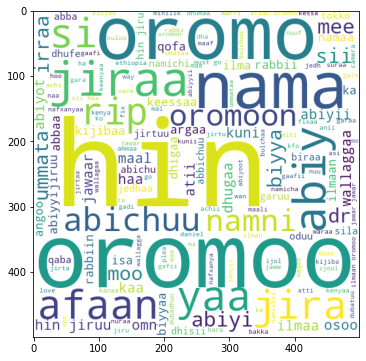

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(normal_wc)

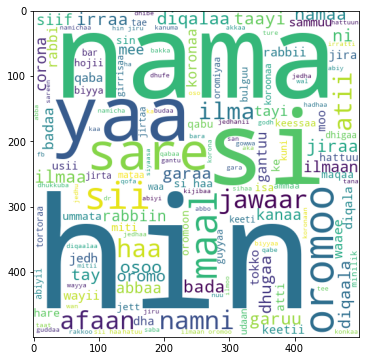

In [41]:
hate_wc=wc.generate(Hate[Hate['label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(hate_wc)

In [42]:
Hate.head()

,post,label,num_characters,num_words,num_sentence,transformed_text
0,mumicha minster ethiopian jawar mohammed insh...,1,52,6,1,mumicha minster ethiopian jawar moham inshallah
1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...,0,168,26,1,rabbiin dhabamaa si haa godhuu xalaatni tokko ...
2,kiyaa ajawaa dhagefachu jibee wly walagaatii ...,0,92,13,1,kiyaa ajawaa dhagefachu jibe wli walagaatii il...
3,dubartoonni oromoo dress qofa jijjiiradhaa paa...,1,81,10,1,dubartoonni oromoo dress qofa jijjiiradhaa paa...
4,omn dhabe midia amara jelaa ilala turee namit...,1,79,13,1,omn dhabe midia amara jelaa ilala ture namiti ...


In [43]:
normal_corpus=[]
for msg in Hate[Hate['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        normal_corpus.append(word)

In [44]:
len(normal_corpus)

14734

In [45]:
!pip install collection

C:\Users\ASME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


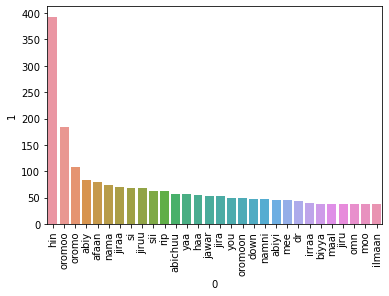

In [46]:
#those are the most common normal common text from the corpus
from collections import Counter
sns.barplot(pd.DataFrame(Counter(normal_corpus).most_common(30))[0],pd.DataFrame(Counter(normal_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
hate_corpus=[]
for msg in Hate[Hate['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        hate_corpus.append(word)

In [48]:
len(hate_corpus)

11060

C:\Users\ASME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


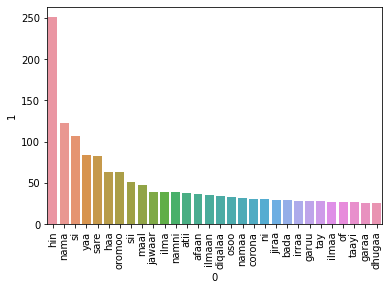

In [49]:
#those are the most common hate common text from the corpus
from collections import Counter
sns.barplot(pd.DataFrame(Counter(hate_corpus).most_common(30))[0],pd.DataFrame(Counter(hate_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4.MODEL BUILDING

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [51]:
x=cv.fit_transform(Hate['transformed_text']).toarray()

In [52]:
x.shape

(3838, 10538)

In [53]:
y=Hate['label'].values

In [54]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [55]:
# for splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 20)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [57]:
DT=DecisionTreeClassifier(max_depth=5)
Gnb=GaussianNB()
Svm=SVC(kernel='sigmoid',gamma=1.0)
Knn=KNeighborsClassifier()
Rf=RandomForestClassifier(n_estimators = 50, random_state = 2)
Ad=AdaBoostClassifier(n_estimators = 50, random_state = 2)
B=BaggingClassifier(n_estimators = 50, random_state = 2)
E=ExtraTreesClassifier(n_estimators = 50, random_state = 2)
G=GradientBoostingClassifier(n_estimators = 50, random_state = 2)
X=XGBClassifier(n_estimators = 50, random_state = 2)


In [58]:
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
Gnb.fit(x_train,y_train)
Gnb_pred=Gnb.predict(x_test)
Svm.fit(x_train,y_train)
Svm_pred=Svm.predict(x_test)
Knn.fit(x_train,y_train)
Knn_pred=Knn.predict(x_test)
Rf.fit(x_train,y_train)
Rf_pred=Rf.predict(x_test)
Ad.fit(x_train,y_train)
Ad_pred=Ad.predict(x_test)
B.fit(x_train,y_train)
B_pred=B.predict(x_test)
E.fit(x_train,y_train)
E_pred=E.predict(x_test)
G.fit(x_train,y_train)
G_pred=G.predict(x_test)
X.fit(x_train,y_train)
X_pred=G.predict(x_test)


In [59]:
print("accuracy_score of Nearest_Neighbors",accuracy_score(y_test,Knn_pred))
print("accuracy_score of Suport Vector Machines",accuracy_score(y_test,Svm_pred))
print("accuracy_score of Decision Tree",accuracy_score(y_test,DT_pred))
print("accuracy_score of Naive_Bayes",accuracy_score(y_test,Gnb_pred))
print("accuracy_score of RandomForest",accuracy_score(y_test,Rf_pred))
print("accuracy_score of Adaboosting classifier",accuracy_score(y_test,Ad_pred))
print("accuracy_score of BaggingClassifier",accuracy_score(y_test,B_pred))
print("accuracy_score of ExtraTrees Classifier",accuracy_score(y_test,E_pred))
print("accuracy_score of GradientBoostingClassifier",accuracy_score(y_test,G_pred))
print("accuracy_score of XGBC",accuracy_score(y_test,X_pred))

accuracy_score of Nearest_Neighbors 0.62890625
accuracy_score of Suport Vector Machines 0.6979166666666666
accuracy_score of Decision Tree 0.6783854166666666
accuracy_score of Naive_Bayes 0.5494791666666666
accuracy_score of RandomForest 0.76953125
accuracy_score of Adaboosting classifier 0.7421875
accuracy_score of BaggingClassifier 0.7513020833333334
accuracy_score of ExtraTrees Classifier 0.7578125
accuracy_score of GradientBoostingClassifier 0.7057291666666666
accuracy_score of XGBC 0.7057291666666666


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
print("\nClassification report for K-Nearest Neighbor") 
print(classification_report(y_test,Knn_pred))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.48      0.37      0.41       275
           1       0.69      0.77      0.73       493

    accuracy                           0.63       768
   macro avg       0.58      0.57      0.57       768
weighted avg       0.61      0.63      0.62       768



In [61]:
print("\nClassification report for Suport Vector Machines") 
print(classification_report(y_test,Svm_pred))


Classification report for Suport Vector Machines
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       275
           1       0.75      0.80      0.77       493

    accuracy                           0.70       768
   macro avg       0.67      0.66      0.66       768
weighted avg       0.69      0.70      0.69       768



In [62]:
print("\nClassification report for Decision Tree") 
print(classification_report(y_test,DT_pred))


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.73      0.16      0.27       275
           1       0.67      0.97      0.79       493

    accuracy                           0.68       768
   macro avg       0.70      0.56      0.53       768
weighted avg       0.69      0.68      0.61       768



In [63]:
print("\nClassification report for Naive Bayes") 
print(classification_report(y_test,Gnb_pred))


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.43      0.81      0.56       275
           1       0.80      0.40      0.53       493

    accuracy                           0.55       768
   macro avg       0.61      0.61      0.55       768
weighted avg       0.66      0.55      0.54       768



In [64]:
print("\nClassification report for Randomforest") 
print(classification_report(y_test,Rf_pred))


Classification report for Randomforest
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       275
           1       0.77      0.91      0.84       493

    accuracy                           0.77       768
   macro avg       0.77      0.71      0.73       768
weighted avg       0.77      0.77      0.76       768



In [65]:
print("\nClassification report for Adaboosting classifier") 
print(classification_report(y_test,Ad_pred))
print("\nClassification report for BaggingClassifier") 
print(classification_report(y_test,B_pred))
print("\nClassification report for ExtraTrees Classifier") 
print(classification_report(y_test,E_pred))
print("\nClassification report for GradientBoostingClassifier") 
print(classification_report(y_test,G_pred))
print("\nClassification report forXGBC") 
print(classification_report(y_test,X_pred))


Classification report for Adaboosting classifier
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       275
           1       0.74      0.92      0.82       493

    accuracy                           0.74       768
   macro avg       0.75      0.67      0.68       768
weighted avg       0.74      0.74      0.72       768


Classification report for BaggingClassifier
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       275
           1       0.77      0.88      0.82       493

    accuracy                           0.75       768
   macro avg       0.74      0.70      0.71       768
weighted avg       0.75      0.75      0.74       768


Classification report for ExtraTrees Classifier
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       275
           1       0.78      0.88      0.82       493

    accuracy                          

In [66]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(confusion_matrix(y_test,Knn_pred))
print("\nConfusion matrix for Naive Bayes") 
print(confusion_matrix(y_test,Gnb_pred))
print("\nConfusion matrix for Decision Tree") 
print(confusion_matrix(y_test,DT_pred))
print("\nConfusion matrix for Suport Vector Machines") 
print(confusion_matrix(y_test,Svm_pred))
print("\nConfusion matrix for RandomForest") 
print(confusion_matrix(y_test,Rf_pred))
print("\nConfusion matrix for Adaboosting classifier") 
print(confusion_matrix(y_test,Ad_pred))
print("\nConfusion matrix for BaggingClassifier") 
print(confusion_matrix(y_test,B_pred))
print("\nConfusion matrix for ExtraTrees Classifier") 
print(confusion_matrix(y_test,E_pred))
print("\nConfusion matrix for GradientBoostingClassifier") 
print(confusion_matrix(y_test,G_pred))
print("\nConfusion matrixt for XGBC") 
print(confusion_matrix(y_test,X_pred))


Confusion matrix for K-Nearest Neighbor
[[101 174]
 [111 382]]

Confusion matrix for Naive Bayes
[[224  51]
 [295 198]]

Confusion matrix for Decision Tree
[[ 45 230]
 [ 17 476]]

Confusion matrix for Suport Vector Machines
[[144 131]
 [101 392]]

Confusion matrix for RandomForest
[[141 134]
 [ 43 450]]

Confusion matrix for Adaboosting classifier
[[115 160]
 [ 38 455]]

Confusion matrix for BaggingClassifier
[[143 132]
 [ 59 434]]

Confusion matrix for ExtraTrees Classifier
[[150 125]
 [ 61 432]]

Confusion matrix for GradientBoostingClassifier
[[ 57 218]
 [  8 485]]

Confusion matrixt for XGBC
[[ 57 218]
 [  8 485]]


 # AUC-ROC Curve in Machine Learning Clearly Explained

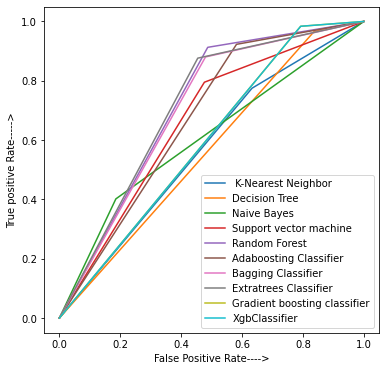

In [67]:
from sklearn.metrics import roc_curve,auc
k_fpr,k_tpr,threshold=roc_curve(y_test,Knn_pred)
auc_knn=auc(k_fpr,k_tpr)
nb_fpr,nb_tpr,threshold=roc_curve(y_test,Gnb_pred)
auc_G=auc(nb_fpr,nb_tpr)
dt_fpr,dt_tpr,threshold=roc_curve(y_test,DT_pred)
auc_dt=auc(dt_fpr,dt_tpr)
svm_fpr,svm_tpr,threshold=roc_curve(y_test,Svm_pred)
auc_Svm=auc(svm_fpr,svm_tpr)
rf_fpr,rf_tpr,threshold=roc_curve(y_test,Rf_pred)
auc_rf=auc(rf_fpr,rf_tpr)
ad_fpr,ad_tpr,threshold=roc_curve(y_test,Ad_pred)
auc_ad=auc(ad_fpr,ad_tpr)
b_fpr,b_tpr,threshold=roc_curve(y_test,B_pred)
auc_b=auc(b_fpr,b_tpr)
e_fpr,e_tpr,threshold=roc_curve(y_test,E_pred)
auc_e=auc(e_fpr,e_tpr)
g_fpr,g_tpr,threshold=roc_curve(y_test,G_pred)
auc_g=auc(g_fpr,g_tpr)
x_fpr,x_tpr,threshold=roc_curve(y_test,X_pred)
auc_x=auc(x_fpr,x_tpr)
plt.figure(figsize=(6,6))
plt.plot(k_fpr,k_tpr,linestyle='-',label=' K-Nearest Neighbor'%auc_knn)
plt.plot(dt_fpr,dt_tpr,linestyle='-',label='Decision Tree'%auc_dt)
plt.plot(nb_fpr,nb_tpr,linestyle='-',label='Naive Bayes'%auc_G)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='Support vector machine'%auc_Svm)
plt.plot(rf_fpr,rf_tpr,linestyle='-',label='Random Forest'%auc_rf)
plt.plot(ad_fpr,ad_tpr,linestyle='-',label='Adaboosting Classifier'%auc_ad)
plt.plot(b_fpr,b_tpr,linestyle='-',label='Bagging Classifier'%auc_b)
plt.plot(e_fpr,e_tpr,linestyle='-',label='Extratrees Classifier'%auc_e)
plt.plot(g_fpr,g_tpr,linestyle='-',label='Gradient boosting classifier'%auc_g)
plt.plot(x_fpr,x_tpr,linestyle='-',label='XgbClassifier'%auc_x)
plt.xlabel('False Positive Rate---->')
plt.ylabel('True positive Rate----->')
plt.legend()
plt.show()


In [68]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [69]:
!pip install opencv-python

In [70]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [71]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(Svm,open('model.pkl','wb'))
